In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# load preprocessed data
data = pd.read_csv('preprocessed_popular_spotify_songs.csv')
# print(data.columns)

# select numeric features
all_features = data.select_dtypes(include=[np.number]).columns.tolist()

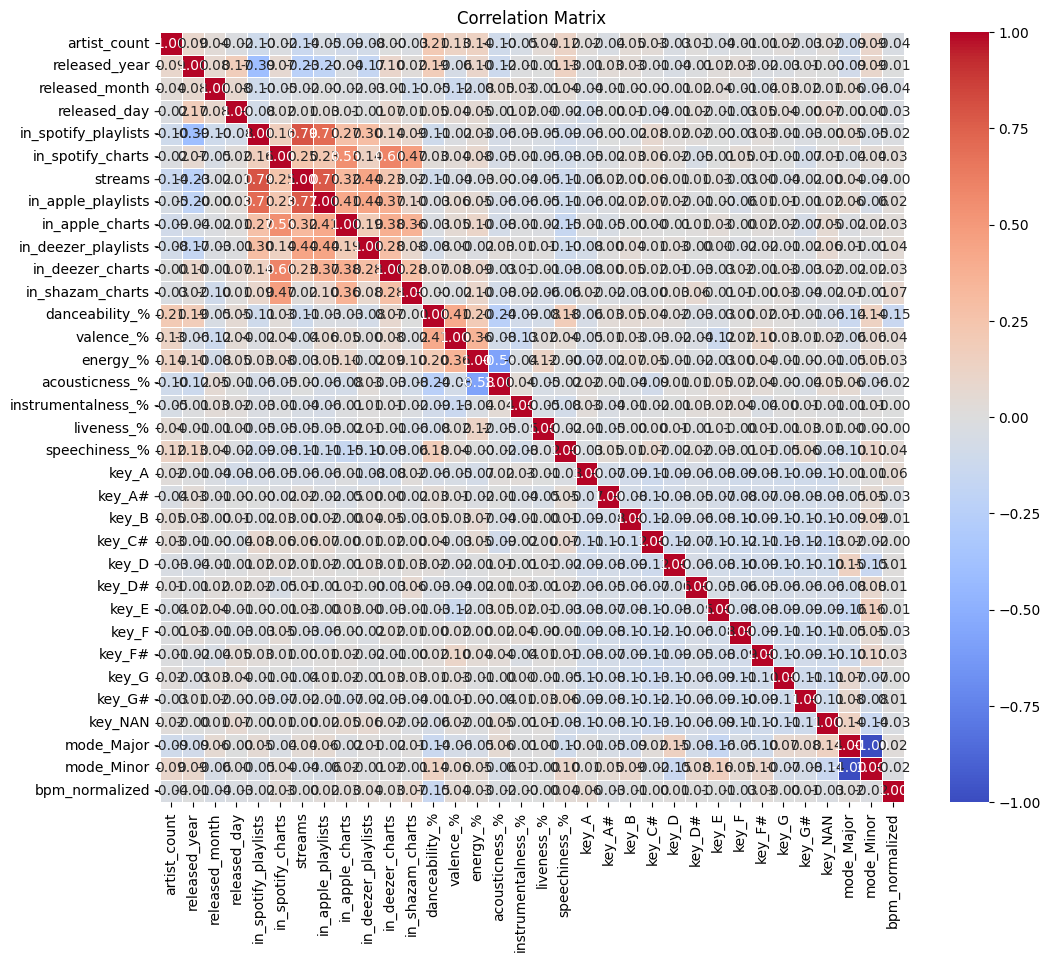

In [2]:
# correlation matrix to show numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(data[all_features].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

Selected features for models:
- in_spotify_playlists
- in_apple_charts
- in_shazam_charts
- danceability_%
- bpm_normalized
- valence_%
- energy_%

In [3]:
categorical_features = ['in_spotify_playlists', 'in_apple_charts', 'in_shazam_charts']
numeric_features = ['danceability_%', 'bpm_normalized', 'valence_%', 'energy_%']

selected_features = categorical_features + numeric_features

# summarize selected features
stats = data[selected_features].describe()
print(stats)

       in_spotify_playlists  in_apple_charts  in_shazam_charts  \
count            953.000000       953.000000        953.000000   
mean            5200.124869        51.908709         48.235047   
std             7897.608990        50.630241        123.196499   
min               31.000000         0.000000          0.000000   
25%              875.000000         7.000000          0.000000   
50%             2224.000000        38.000000          2.000000   
75%             5542.000000        87.000000         32.000000   
max            52898.000000       275.000000        953.000000   

       danceability_%  bpm_normalized   valence_%    energy_%  
count       953.00000    9.530000e+02  953.000000  953.000000  
mean         66.96957   -2.423152e-16   51.431270   64.279119  
std          14.63061    1.000525e+00   23.480632   16.550526  
min          23.00000   -2.051858e+00    4.000000    9.000000  
25%          57.00000   -8.037777e-01   32.000000   53.000000  
50%          69.00000

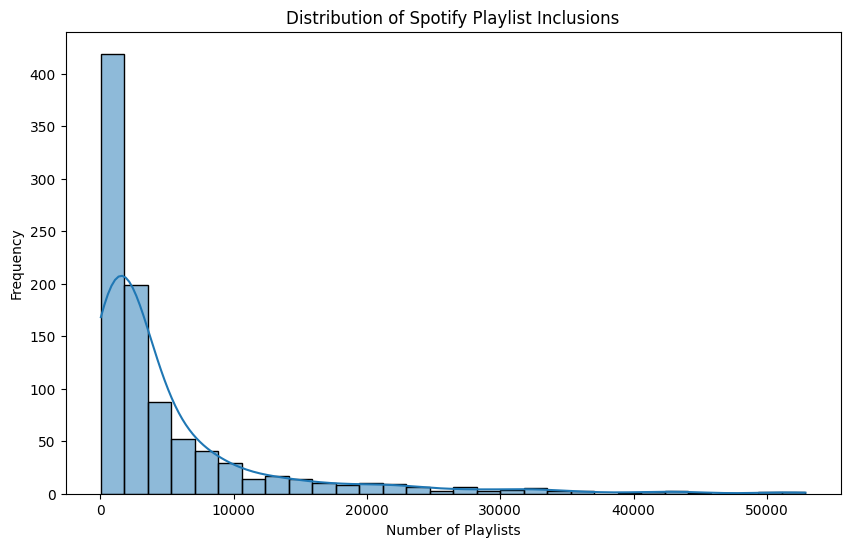

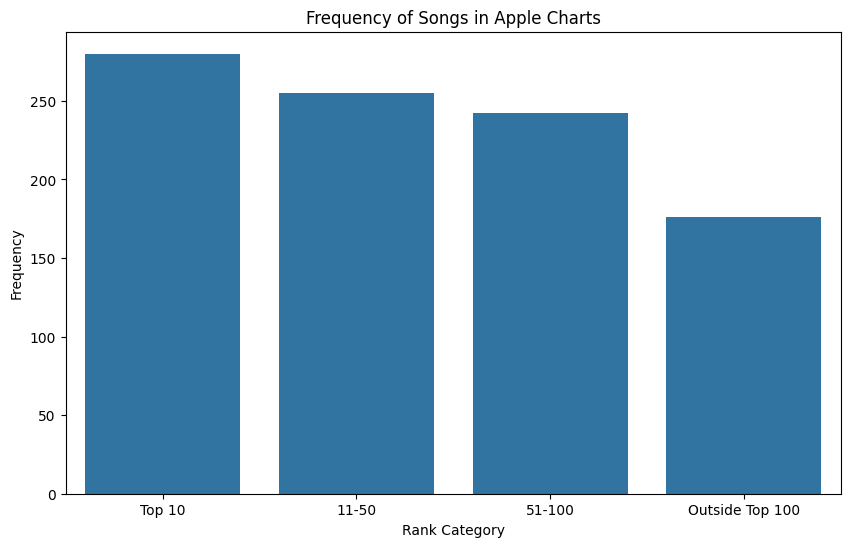

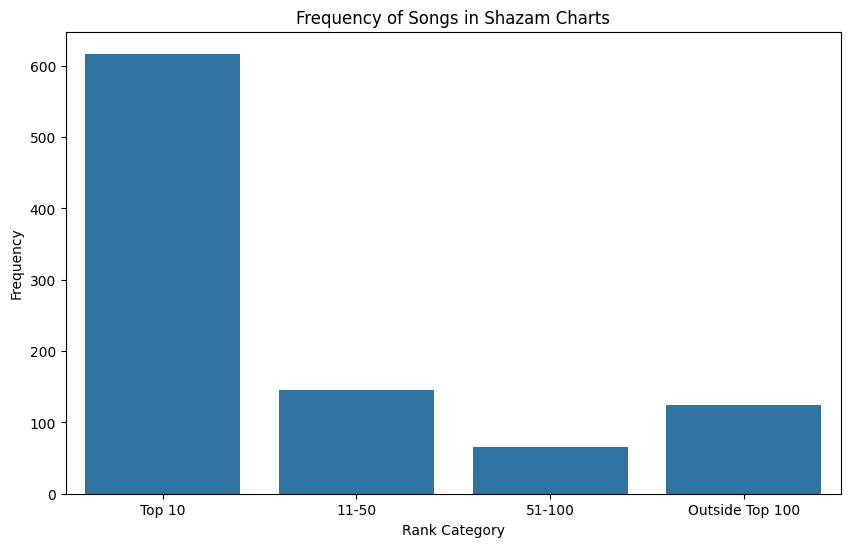

In [4]:
# plot 'in_spotify_playlists' as a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['in_spotify_playlists'], bins=30, kde=True)
plt.title('Distribution of Spotify Playlist Inclusions')
plt.xlabel('Number of Playlists')
plt.ylabel('Frequency')
plt.show()

# categorize chart rank data
def categorize_rank(rank):
    if rank <= 10:
        return 'Top 10'
    elif rank <= 50:
        return '11-50'
    elif rank <= 100:
        return '51-100'
    else:
        return 'Outside Top 100'

# determine categories
apple_categories = data['in_apple_charts'].apply(categorize_rank)
shazam_categories = data['in_shazam_charts'].apply(categorize_rank)
chart_features = {'Apple Charts': apple_categories, 
                  'Shazam Charts': shazam_categories}

for chart, chart_data in chart_features.items():
    plt.figure(figsize=(10, 6))
    count_data = chart_data.value_counts().reset_index()
    count_data.columns = ['Category', 'Count']
    count_data = count_data.sort_values(by='Category')
    sns.barplot(x='Category', y='Count', data=count_data, order=['Top 10', '11-50', '51-100', 'Outside Top 100'])
    plt.title(f'Frequency of Songs in {chart}')
    plt.xlabel('Rank Category')
    plt.ylabel('Frequency')
    plt.show()

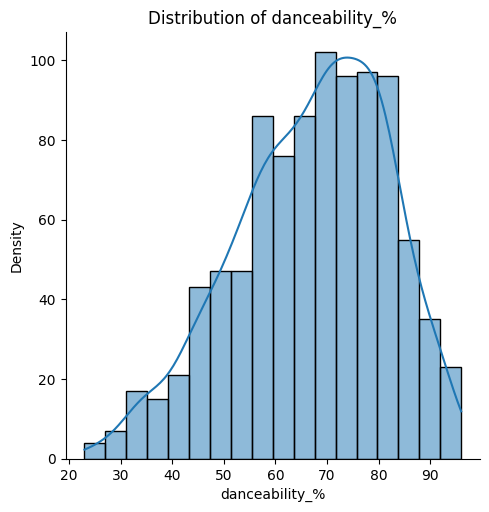

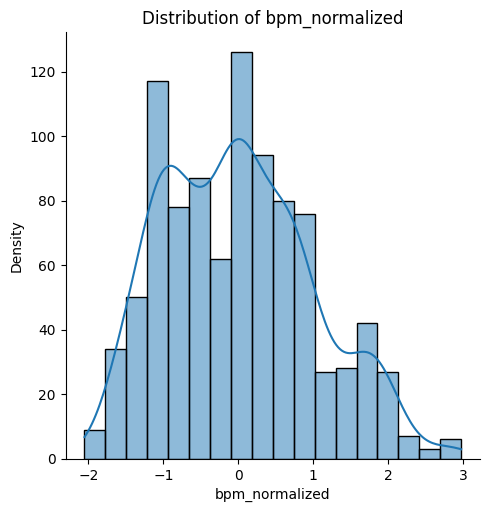

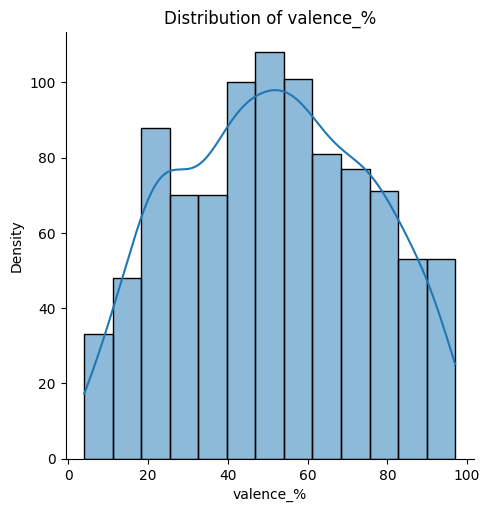

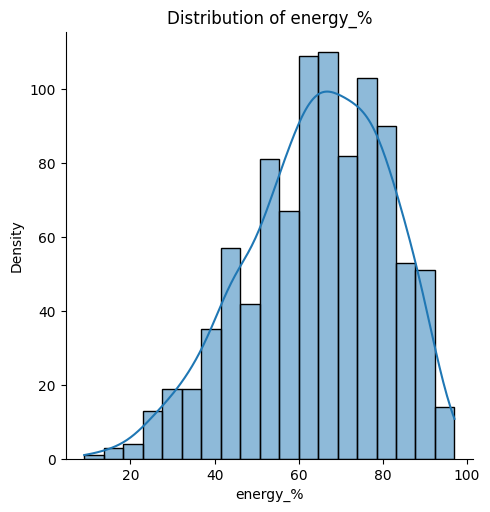

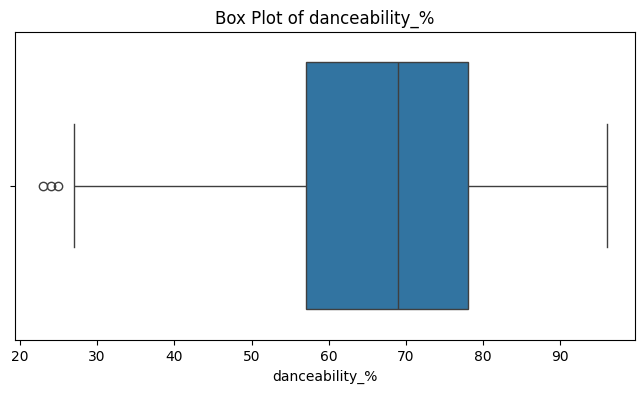

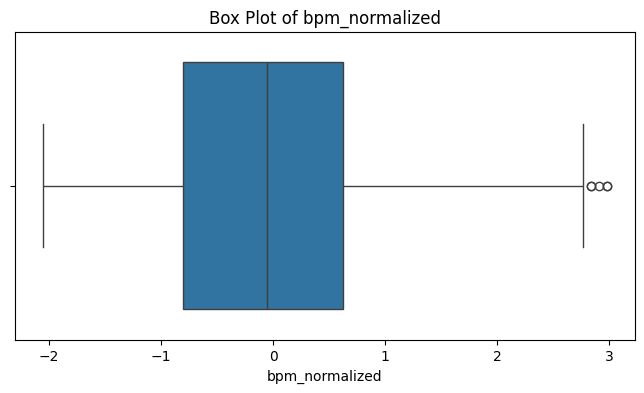

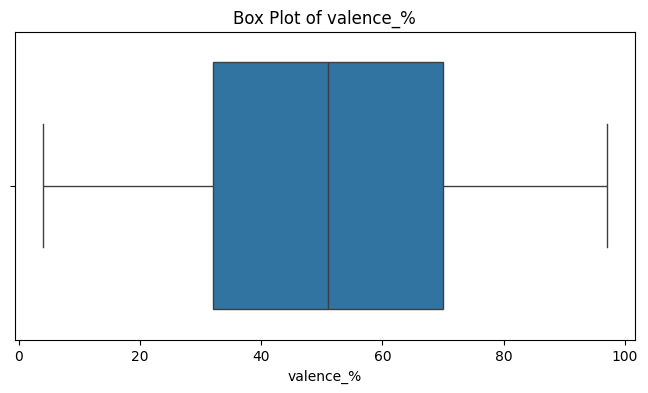

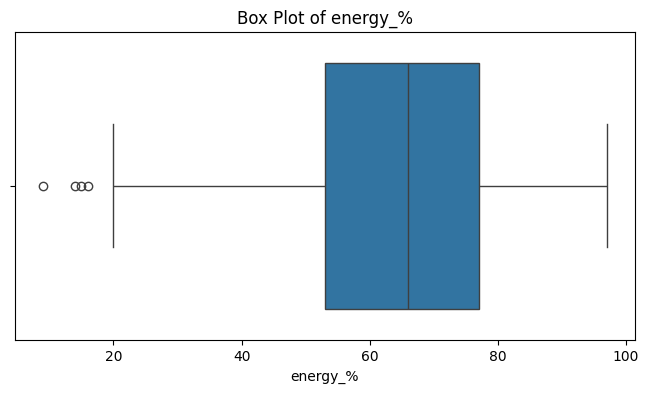

In [5]:
# plot distribution of values
for feature in numeric_features:
    sns.displot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()

# box plots showing outliers
for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()